In [543]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from plotly.offline import plot, iplot, init_notebook_mode
%pip install xgboost

warnings.filterwarnings("ignore")


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


##### If y haddock score limit is lower than (-129) then = 1, else = 0

In [544]:
pd.set_option('display.max_columns', 500)

In [545]:
# Read the data
data = pd.read_csv('./input/MammalTrainingData080221_NvAdded.csv')
data

,Species,ForStrat_terrestrial,ForStrat_aquatic,Activity.Nocturnal,Activity.Crepuscular,Activity.Diurnal,female_maturity_d,male_maturity_d,weaning_d,litters_or_clutches_per_y,longevity_y,adult_svl_cm,infantMortalityRate_per_year,mortalityRateDoublingTime_y,metabolicRate_W,temperature_K,diet_breadth,development_d,mass_specific_production,log_litterclutch_size_n,log_inter_litterbirth_interval_y,log_birthhatching_weight_g,log_weaning_weight_g,log_adult_body_mass_g,log_female_body_mass_g,log_male_body_mass_g,tnc_ecoregion_breadth,log_range_size,X2.1_AgeatEyeOpening_d,X9.1_GestationLen_d,X10.2_SocialGrpSize,X24.1_TeatNumber,X6.2_TrophicLevel,X13.3_WeaningHeadBodyLen_mm,X26.2_GR_MaxLat_dd,X26.3_GR_MinLat_dd,X26.4_GR_MidRangeLat_dd,X26.5_GR_MaxLong_dd,X26.6_GR_MinLong_dd,X26.7_GR_MidRangeLong_dd,X27.4_HuPopDen_Change,X28.1_Precip_Mean_mm,X28.2_Temp_Mean_01degC,X30.1_AET_Mean_mm,X30.2_PET_Mean_mm,log_DispersalAge_d,log_HomeRange_km2,log_HomeRange_Indiv_km2,log_PopulationDensity_n.km2,log_PopulationGrpSize,log_HuPopDen_Min_n.km2,log_HuPopDen_Mean_n.km2,log_HuPopDen_5p_n.km2,log_NeonateHeadBodyLen_mm,log_WOS_hits,Afrosoricida,Artiodactyla,Carnivora,Cetacea,Chiroptera,Cingulata,Dasyuromorphia,Didelphimorphia,Diprotodontia,Erinaceomorpha,Lagomorpha,Macroscelidea,Monotremata,Perissodactyla,Pholidota,Primates,Proboscidea,Rodentia,Sirenia,Soricomorpha,Tubulidentata,nchar,haddock_score_mean,haddock_score_sd,AA_83_Y,AA_30_negative
0,Neovison vison,1.0,0.0,1.0,1.0,0.0,297.722620,371.000000,49.000000,1.000000,10.695833,43.000000,NaN,NaN,2.722,312.15,0.4,36.220620,0.045709,1.560248,-0.000685,2.156403,4.700480,6.802117,7.013985,7.444249,27.000000,16.494735,NaN,36.705987,NaN,NaN,NaN,NaN,71.390000,24.940000,48.160000,-55.610000,-168.120000,-111.870000,0.030000,55.370000,14.910000,458.260000,529.250000,NaN,-2.866854,-2.754329,4.085635,NaN,1.056682,3.006178,0.025741,3.803203,7.557473,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,805,-144.814760,1.580668,1,1
1,Acinonyx jubatus,1.0,0.0,0.0,0.0,1.0,598.985000,456.000000,107.000000,0.700000,19.000000,149.021500,NaN,NaN,61.770,312.15,0.1,89.060000,0.019578,1.111858,0.395145,6.142747,7.570443,10.831270,9.846167,10.988802,0.309524,15.448508,9.03,92.240000,NaN,12.0,3.0,NaN,37.720000,-29.220000,4.240000,60.820000,-14.910000,22.950000,0.110000,51.260000,230.830000,595.060000,1499.040000,6.142037,4.480400,4.547329,-4.605170,NaN,0.907587,2.989714,-0.067474,5.521461,6.694562,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,805,-127.078110,1.747960,1,1
2,Aotus nancymaae,1.0,0.0,1.0,0.0,0.0,683.548198,627.229743,199.718698,1.373433,11.391667,37.000000,NaN,NaN,NaN,NaN,0.6,127.745221,0.153402,0.019803,-0.116040,4.275836,6.129428,6.673336,7.444762,6.720834,0.083333,13.107712,NaN,108.672743,4.0,NaN,2.0,NaN,-2.720000,-6.470000,-4.590000,-66.610000,-75.950000,-71.280000,0.050000,228.040000,261.240000,1531.250000,1533.130000,NaN,-2.939557,-2.663378,3.337903,NaN,1.669032,0.122218,0.455452,4.046583,4.700481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,805,-140.619180,2.629311,1,1
3,Balaenoptera acutorostrata,0.0,1.0,0.0,0.0,1.0,2740.000000,2740.000000,167.340000,1.000000,48.500000,786.465500,NaN,NaN,NaN,NaN,0.2,309.306350,0.042667,0.000000,0.252002,12.676076,14.492895,15.830414,10.918308,14.592295,0.559524,18.728611,NaN,304.160000,2.0,NaN,3.0,NaN,11.659394,0.560051,6.201413,35.846219,14.805832,25.230358,NaN,148.434830,177.854437,894.442357,1307.267867,NaN,2.442211,-2.458595,-1.034633,0.0,1.632281,1.625241,0.654467,8.935902,6.159096,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,804,-117.739420,2.003812,1,0
4,Bos mutus,NaN,NaN,NaN,NaN,NaN,494.972661,702.981099,90.199617,1.068823,11.245579,38.234507,NaN,NaN,NaN,NaN,NaN,120.038185,0.407257,0.526610,-0.172863,2.924968,5.166991,NaN,5.248068,6.018212,0.047619,13.059399,NaN,108.754439,NaN,NaN,NaN,NaN,13.695438,-0.794176,6.201413,35.846219,14.805832,25.230358,NaN,149.293170,181.553030,875.991850,1326.443988,NaN,-1.319838,-2.781916,5.082738,NaN,1.847101,1.977512,0.721810,3.975580,3.663564,0,1,0,0,0,0,0,

In [546]:
# binarize haddock score column if the score is lower than (-129) then 1 else 0
# 1 == higher binding strength 
data['binary_haddock_score'] = np.where(data['haddock_score_mean'] < -129, 1, 0)
data

,Species,ForStrat_terrestrial,ForStrat_aquatic,Activity.Nocturnal,Activity.Crepuscular,Activity.Diurnal,female_maturity_d,male_maturity_d,weaning_d,litters_or_clutches_per_y,longevity_y,adult_svl_cm,infantMortalityRate_per_year,mortalityRateDoublingTime_y,metabolicRate_W,temperature_K,diet_breadth,development_d,mass_specific_production,log_litterclutch_size_n,log_inter_litterbirth_interval_y,log_birthhatching_weight_g,log_weaning_weight_g,log_adult_body_mass_g,log_female_body_mass_g,log_male_body_mass_g,tnc_ecoregion_breadth,log_range_size,X2.1_AgeatEyeOpening_d,X9.1_GestationLen_d,X10.2_SocialGrpSize,X24.1_TeatNumber,X6.2_TrophicLevel,X13.3_WeaningHeadBodyLen_mm,X26.2_GR_MaxLat_dd,X26.3_GR_MinLat_dd,X26.4_GR_MidRangeLat_dd,X26.5_GR_MaxLong_dd,X26.6_GR_MinLong_dd,X26.7_GR_MidRangeLong_dd,X27.4_HuPopDen_Change,X28.1_Precip_Mean_mm,X28.2_Temp_Mean_01degC,X30.1_AET_Mean_mm,X30.2_PET_Mean_mm,log_DispersalAge_d,log_HomeRange_km2,log_HomeRange_Indiv_km2,log_PopulationDensity_n.km2,log_PopulationGrpSize,log_HuPopDen_Min_n.km2,log_HuPopDen_Mean_n.km2,log_HuPopDen_5p_n.km2,log_NeonateHeadBodyLen_mm,log_WOS_hits,Afrosoricida,Artiodactyla,Carnivora,Cetacea,Chiroptera,Cingulata,Dasyuromorphia,Didelphimorphia,Diprotodontia,Erinaceomorpha,Lagomorpha,Macroscelidea,Monotremata,Perissodactyla,Pholidota,Primates,Proboscidea,Rodentia,Sirenia,Soricomorpha,Tubulidentata,nchar,haddock_score_mean,haddock_score_sd,AA_83_Y,AA_30_negative,binary_haddock_score
0,Neovison vison,1.0,0.0,1.0,1.0,0.0,297.722620,371.000000,49.000000,1.000000,10.695833,43.000000,NaN,NaN,2.722,312.15,0.4,36.220620,0.045709,1.560248,-0.000685,2.156403,4.700480,6.802117,7.013985,7.444249,27.000000,16.494735,NaN,36.705987,NaN,NaN,NaN,NaN,71.390000,24.940000,48.160000,-55.610000,-168.120000,-111.870000,0.030000,55.370000,14.910000,458.260000,529.250000,NaN,-2.866854,-2.754329,4.085635,NaN,1.056682,3.006178,0.025741,3.803203,7.557473,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,805,-144.814760,1.580668,1,1,1
1,Acinonyx jubatus,1.0,0.0,0.0,0.0,1.0,598.985000,456.000000,107.000000,0.700000,19.000000,149.021500,NaN,NaN,61.770,312.15,0.1,89.060000,0.019578,1.111858,0.395145,6.142747,7.570443,10.831270,9.846167,10.988802,0.309524,15.448508,9.03,92.240000,NaN,12.0,3.0,NaN,37.720000,-29.220000,4.240000,60.820000,-14.910000,22.950000,0.110000,51.260000,230.830000,595.060000,1499.040000,6.142037,4.480400,4.547329,-4.605170,NaN,0.907587,2.989714,-0.067474,5.521461,6.694562,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,805,-127.078110,1.747960,1,1,0
2,Aotus nancymaae,1.0,0.0,1.0,0.0,0.0,683.548198,627.229743,199.718698,1.373433,11.391667,37.000000,NaN,NaN,NaN,NaN,0.6,127.745221,0.153402,0.019803,-0.116040,4.275836,6.129428,6.673336,7.444762,6.720834,0.083333,13.107712,NaN,108.672743,4.0,NaN,2.0,NaN,-2.720000,-6.470000,-4.590000,-66.610000,-75.950000,-71.280000,0.050000,228.040000,261.240000,1531.250000,1533.130000,NaN,-2.939557,-2.663378,3.337903,NaN,1.669032,0.122218,0.455452,4.046583,4.700481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,805,-140.619180,2.629311,1,1,1
3,Balaenoptera acutorostrata,0.0,1.0,0.0,0.0,1.0,2740.000000,2740.000000,167.340000,1.000000,48.500000,786.465500,NaN,NaN,NaN,NaN,0.2,309.306350,0.042667,0.000000,0.252002,12.676076,14.492895,15.830414,10.918308,14.592295,0.559524,18.728611,NaN,304.160000,2.0,NaN,3.0,NaN,11.659394,0.560051,6.201413,35.846219,14.805832,25.230358,NaN,148.434830,177.854437,894.442357,1307.267867,NaN,2.442211,-2.458595,-1.034633,0.0,1.632281,1.625241,0.654467,8.935902,6.159096,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,804,-117.739420,2.003812,1,0,0
4,Bos mutus,NaN,NaN,NaN,NaN,NaN,494.972661,702.981099,90.199617,1.068823,11.245579,38.234507,NaN,NaN,NaN,NaN,NaN,120.038185,0.407257,0.526610,-0.172863,2.924968,5.166991,NaN,5.248068,6.018212,0.047619,13.059399,NaN,108.754439,NaN,NaN,NaN,NaN,13.695438,-0.794176,6.201413,35.846219,14.805832,25.230358,NaN,149.293170,181.553030,875.991850,1326.443988,NaN,-1.319838,-2.781916,5.082738,NaN,1.847101,1.977512,0.721810,3.9

In [547]:
# data is balanced
data['binary_haddock_score'].value_counts()

binary_haddock_score
1    58
0    55
Name: count, dtype: int64

In [550]:
# dropping columns because of missing values + species
data = data.drop(['Species', 'haddock_score_mean','infantMortalityRate_per_year',
                  'mortalityRateDoublingTime_y','log_DispersalAge_d','log_PopulationGrpSize'],
                  axis=1)

In [552]:
# Detecting outliers with mean and standard deviation
mean, std = [], []
for col in data.columns:
    mean.append(np.mean(data[col]))
    std.append(np.std(data[col]))
print('length: (mean)', len(mean))#, mean.shape)
mean # mean of each attribute

length: (mean) 76


[0.8715596330275229,
 0.12844036697247707,
 0.6972477064220184,
 0.29357798165137616,
 0.46788990825688076,
 1022.4766558780318,
 1150.8019466599958,
 215.5295503059473,
 1.3084835457397594,
 22.554447435976094,
 112.54815991101373,
 15.334944186046512,
 309.61481481481485,
 0.23027522935779818,
 143.9468608816732,
 0.2762712166886184,
 0.5995354397634647,
 -0.1275854130978098,
 4.332207483844622,
 6.323244886114043,
 7.562294277692722,
 7.177819005312888,
 7.671922700331731,
 0.7489462262381141,
 14.477926392575434,
 10.58736842105263,
 147.68844382968012,
 16.085,
 5.576923076923077,
 2.215909090909091,
 1949.7475,
 23.49902186035525,
 -1.6568608199943715,
 10.90143810435817,
 45.5739207088634,
 0.029417225761896305,
 22.781842724153016,
 0.08024719595555556,
 106.22269750992217,
 167.47424755984085,
 840.8234626167578,
 1235.888836312819,
 -0.790882760426764,
 -1.435529268897314,
 3.10307739883547,
 0.8957156898813204,
 3.4211319044112574,
 0.8015399200716836,
 4.744589341937948,
 5

In [555]:
# Removing outliers
def remove_out(df):
    mean = df.mean()
    std = df.std()
    std_size = 3
    outlier_mask = (np.abs(df - mean) <= std_size * std)
    cleaned_df = df[outlier_mask]
    return cleaned_df

cleaned_data = remove_out(data)
data = cleaned_data
data

,ForStrat_terrestrial,ForStrat_aquatic,Activity.Nocturnal,Activity.Crepuscular,Activity.Diurnal,female_maturity_d,male_maturity_d,weaning_d,litters_or_clutches_per_y,longevity_y,adult_svl_cm,metabolicRate_W,temperature_K,diet_breadth,development_d,mass_specific_production,log_litterclutch_size_n,log_inter_litterbirth_interval_y,log_birthhatching_weight_g,log_weaning_weight_g,log_adult_body_mass_g,log_female_body_mass_g,log_male_body_mass_g,tnc_ecoregion_breadth,log_range_size,X2.1_AgeatEyeOpening_d,X9.1_GestationLen_d,X10.2_SocialGrpSize,X24.1_TeatNumber,X6.2_TrophicLevel,X13.3_WeaningHeadBodyLen_mm,X26.2_GR_MaxLat_dd,X26.3_GR_MinLat_dd,X26.4_GR_MidRangeLat_dd,X26.5_GR_MaxLong_dd,X26.6_GR_MinLong_dd,X26.7_GR_MidRangeLong_dd,X27.4_HuPopDen_Change,X28.1_Precip_Mean_mm,X28.2_Temp_Mean_01degC,X30.1_AET_Mean_mm,X30.2_PET_Mean_mm,log_HomeRange_km2,log_HomeRange_Indiv_km2,log_PopulationDensity_n.km2,log_HuPopDen_Min_n.km2,log_HuPopDen_Mean_n.km2,log_HuPopDen_5p_n.km2,log_NeonateHeadBodyLen_mm,log_WOS_hits,Afrosoricida,Artiodactyla,Carnivora,Cetacea,Chiroptera,Cingulata,Dasyuromorphia,Didelphimorphia,Diprotodontia,Erinaceomorpha,Lagomorpha,Macroscelidea,Monotremata,Perissodactyla,Pholidota,Primates,Proboscidea,Rodentia,Sirenia,Soricomorpha,Tubulidentata,nchar,haddock_score_sd,AA_83_Y,AA_30_negative,binary_haddock_score
0,1.0,0.0,1.0,1.0,0.0,297.722620,371.000000,49.000000,1.000000,10.695833,43.000000,2.722,312.15,0.4,36.220620,0.045709,1.560248,-0.000685,2.156403,4.700480,6.802117,7.013985,7.444249,NaN,16.494735,NaN,36.705987,NaN,NaN,NaN,NaN,71.390000,24.940000,48.160000,-55.610000,-168.120000,-111.870000,0.030000,55.370000,14.910000,458.260000,529.250000,-2.866854,-2.754329,4.085635,1.056682,3.006178,0.025741,3.803203,7.557473,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,805.0,1.580668,1,1,1
1,1.0,0.0,0.0,0.0,1.0,598.985000,456.000000,107.000000,0.700000,19.000000,149.021500,61.770,312.15,0.1,89.060000,0.019578,1.111858,0.395145,6.142747,7.570443,10.831270,9.846167,10.988802,0.309524,15.448508,9.03,92.240000,NaN,12.0,3.0,NaN,37.720000,-29.220000,4.240000,60.820000,-14.910000,22.950000,0.110000,51.260000,230.830000,595.060000,1499.040000,4.480400,4.547329,-4.605170,0.907587,2.989714,-0.067474,5.521461,6.694562,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,805.0,1.747960,1,1,0
2,1.0,0.0,1.0,0.0,0.0,683.548198,627.229743,199.718698,1.373433,11.391667,37.000000,NaN,NaN,0.6,127.745221,0.153402,0.019803,-0.116040,4.275836,6.129428,6.673336,7.444762,6.720834,0.083333,13.107712,NaN,108.672743,4.0,NaN,2.0,NaN,-2.720000,-6.470000,-4.590000,-66.610000,-75.950000,-71.280000,0.050000,228.040000,261.240000,1531.250000,1533.130000,-2.939557,-2.663378,3.337903,1.669032,0.122218,0.455452,4.046583,4.700481,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,805.0,2.629311,1,1,1
3,0.0,1.0,0.0,0.0,1.0,2740.000000,2740.000000,167.340000,1.000000,48.500000,NaN,NaN,NaN,0.2,309.306350,0.042667,0.000000,0.252002,12.676076,14.492895,15.830414,10.918308,14.592295,0.559524,18.728611,NaN,304.160000,2.0,NaN,3.0,NaN,11.659394,0.560051,6.201413,35.846219,14.805832,25.230358,NaN,148.434830,177.854437,894.442357,1307.267867,2.442211,-2.458595,-1.034633,1.632281,1.625241,0.654467,NaN,6.159096,0.0,0.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,804.0,2.003812,1,0,0
4,NaN,NaN,NaN,NaN,NaN,494.972661,702.981099,90.199617,1.068823,11.245579,38.234507,NaN,NaN,NaN,120.038185,0.407257,0.526610,-0.172863,2.924968,5.166991,NaN,5.248068,6.018212,0.047619,13.059399,NaN,108.754439,NaN,NaN,NaN,NaN,13.695438,-0.794176,6.201413,35.846219,14.805832,25.230358,NaN,149.293170,181.553030,875.991850,1326.443988,-1.319838,-2.781916,5.082738,1.847101,1.977512,0.721810,3.975580,3.663564,0.0,NaN,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,804.0,2.843593,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [556]:
# Normalization (MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data = data_scaled
data

,ForStrat_terrestrial,ForStrat_aquatic,Activity.Nocturnal,Activity.Crepuscular,Activity.Diurnal,female_maturity_d,male_maturity_d,weaning_d,litters_or_clutches_per_y,longevity_y,adult_svl_cm,metabolicRate_W,temperature_K,diet_breadth,development_d,mass_specific_production,log_litterclutch_size_n,log_inter_litterbirth_interval_y,log_birthhatching_weight_g,log_weaning_weight_g,log_adult_body_mass_g,log_female_body_mass_g,log_male_body_mass_g,tnc_ecoregion_breadth,log_range_size,X2.1_AgeatEyeOpening_d,X9.1_GestationLen_d,X10.2_SocialGrpSize,X24.1_TeatNumber,X6.2_TrophicLevel,X13.3_WeaningHeadBodyLen_mm,X26.2_GR_MaxLat_dd,X26.3_GR_MinLat_dd,X26.4_GR_MidRangeLat_dd,X26.5_GR_MaxLong_dd,X26.6_GR_MinLong_dd,X26.7_GR_MidRangeLong_dd,X27.4_HuPopDen_Change,X28.1_Precip_Mean_mm,X28.2_Temp_Mean_01degC,X30.1_AET_Mean_mm,X30.2_PET_Mean_mm,log_HomeRange_km2,log_HomeRange_Indiv_km2,log_PopulationDensity_n.km2,log_HuPopDen_Min_n.km2,log_HuPopDen_Mean_n.km2,log_HuPopDen_5p_n.km2,log_NeonateHeadBodyLen_mm,log_WOS_hits,Afrosoricida,Artiodactyla,Carnivora,Cetacea,Chiroptera,Cingulata,Dasyuromorphia,Didelphimorphia,Diprotodontia,Erinaceomorpha,Lagomorpha,Macroscelidea,Monotremata,Perissodactyla,Pholidota,Primates,Proboscidea,Rodentia,Sirenia,Soricomorpha,Tubulidentata,nchar,haddock_score_sd,AA_83_Y,AA_30_negative,binary_haddock_score
0,1.0,0.0,1.0,1.0,0.0,0.065797,0.075841,0.034741,0.210526,0.138029,0.067902,0.027137,0.864198,0.6,0.047435,0.064324,0.712741,0.625904,0.344187,0.255546,0.357657,0.497357,0.429557,NaN,0.741971,NaN,0.051922,NaN,NaN,NaN,NaN,0.901577,0.818372,0.941017,0.169165,0.036599,0.014533,0.200000,0.187966,0.194218,0.198967,0.104034,0.369099,0.349669,0.633553,0.514713,0.411510,0.162561,0.273348,0.655406,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.365854,0.160701,1.0,1.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.144858,0.095436,0.104223,0.131579,0.269841,0.257353,0.627047,0.864198,0.0,0.164926,0.047067,0.510529,0.719685,0.573453,0.473731,0.635173,0.756037,0.687300,0.320513,0.647623,0.237632,0.170946,NaN,1.0,1.0,NaN,0.630613,0.250419,0.483326,0.579751,0.508595,0.528799,0.600000,0.170364,0.876430,0.288623,0.812691,0.870614,0.828728,0.024512,0.483852,0.409161,0.140070,0.565604,0.580571,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.365854,0.212083,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.167050,0.134908,0.215298,0.308798,0.149074,0.057181,NaN,NaN,1.0,0.250944,0.135447,0.018041,0.598573,0.466081,0.364180,0.348787,0.536702,0.376954,0.076923,0.436531,NaN,0.206166,0.046875,NaN,0.5,NaN,0.305167,0.488989,0.391309,0.130373,0.320548,0.169362,0.300000,0.927452,0.972512,0.902184,0.837602,0.364136,0.355636,0.581153,0.641462,0.000000,0.266244,0.314744,0.407636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.365854,0.482780,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.706728,0.621946,0.176509,0.210526,0.738095,NaN,NaN,NaN,0.2,0.654653,0.062315,0.009111,0.685771,0.949202,1.000000,0.979500,0.853961,0.949329,0.589744,0.943420,NaN,0.625145,0.015625,NaN,1.0,NaN,0.420887,0.562710,0.503766,0.491682,0.600141,0.537498,NaN,0.586530,0.709050,0.484833,0.672557,0.731489,0.369072,0.274731,0.633855,0.214465,0.314263,NaN,0.534133,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341463,0.290665,1.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,0.117562,0.152370,0.084097,0.228638,0.146755,0.059387,NaN,NaN,NaN,0.233807,0.303096,0.246598,0.585111,0.388389,0.291012,NaN,0.336066,0.325862,0.038462,0.432175,NaN,0.206341,NaN,NaN,NaN,NaN,0.437272,0.548509,0.503766,0.491682,0.600141,0.537498,NaN,0.590206,0.720736,0.472741,0.686570,0.474696,0.347859,0.703429,0.678321,0.264731,0.330511,0.302667,0.317711,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341463,0.548594,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [557]:
# fill missing values with k-NN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)
data

,ForStrat_terrestrial,ForStrat_aquatic,Activity.Nocturnal,Activity.Crepuscular,Activity.Diurnal,female_maturity_d,male_maturity_d,weaning_d,litters_or_clutches_per_y,longevity_y,adult_svl_cm,metabolicRate_W,temperature_K,diet_breadth,development_d,mass_specific_production,log_litterclutch_size_n,log_inter_litterbirth_interval_y,log_birthhatching_weight_g,log_weaning_weight_g,log_adult_body_mass_g,log_female_body_mass_g,log_male_body_mass_g,tnc_ecoregion_breadth,log_range_size,X2.1_AgeatEyeOpening_d,X9.1_GestationLen_d,X10.2_SocialGrpSize,X24.1_TeatNumber,X6.2_TrophicLevel,X13.3_WeaningHeadBodyLen_mm,X26.2_GR_MaxLat_dd,X26.3_GR_MinLat_dd,X26.4_GR_MidRangeLat_dd,X26.5_GR_MaxLong_dd,X26.6_GR_MinLong_dd,X26.7_GR_MidRangeLong_dd,X27.4_HuPopDen_Change,X28.1_Precip_Mean_mm,X28.2_Temp_Mean_01degC,X30.1_AET_Mean_mm,X30.2_PET_Mean_mm,log_HomeRange_km2,log_HomeRange_Indiv_km2,log_PopulationDensity_n.km2,log_HuPopDen_Min_n.km2,log_HuPopDen_Mean_n.km2,log_HuPopDen_5p_n.km2,log_NeonateHeadBodyLen_mm,log_WOS_hits,Afrosoricida,Artiodactyla,Carnivora,Cetacea,Chiroptera,Cingulata,Dasyuromorphia,Didelphimorphia,Diprotodontia,Erinaceomorpha,Lagomorpha,Macroscelidea,Monotremata,Perissodactyla,Pholidota,Primates,Proboscidea,Rodentia,Sirenia,Soricomorpha,Tubulidentata,nchar,haddock_score_sd,AA_83_Y,AA_30_negative,binary_haddock_score
0,1.0,0.0,1.0,1.0,0.0,0.065797,0.075841,0.034741,0.210526,0.138029,0.067902,0.027137,0.864198,0.60,0.047435,0.064324,0.712741,0.625904,0.344187,0.255546,0.357657,0.497357,0.429557,0.487179,0.741971,0.571579,0.051922,0.009375,0.54,0.8,0.294645,0.901577,0.818372,0.941017,0.169165,0.036599,0.014533,0.200000,0.187966,0.194218,0.198967,0.104034,0.369099,0.349669,0.633553,0.514713,0.411510,0.162561,0.273348,0.655406,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.365854,0.160701,1.0,1.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.144858,0.095436,0.104223,0.131579,0.269841,0.257353,0.627047,0.864198,0.00,0.164926,0.047067,0.510529,0.719685,0.573453,0.473731,0.635173,0.756037,0.687300,0.320513,0.647623,0.237632,0.170946,0.245312,1.00,1.0,0.294645,0.630613,0.250419,0.483326,0.579751,0.508595,0.528799,0.600000,0.170364,0.876430,0.288623,0.812691,0.870614,0.828728,0.024512,0.483852,0.409161,0.140070,0.565604,0.580571,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.365854,0.212083,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.167050,0.134908,0.215298,0.308798,0.149074,0.057181,0.019523,0.518519,1.00,0.250944,0.135447,0.018041,0.598573,0.466081,0.364180,0.348787,0.536702,0.376954,0.076923,0.436531,0.315316,0.206166,0.046875,0.20,0.5,0.294645,0.305167,0.488989,0.391309,0.130373,0.320548,0.169362,0.300000,0.927452,0.972512,0.902184,0.837602,0.364136,0.355636,0.581153,0.641462,0.000000,0.266244,0.314744,0.407636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.365854,0.482780,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.706728,0.621946,0.176509,0.210526,0.738095,0.650588,0.540504,0.587654,0.20,0.654653,0.062315,0.009111,0.685771,0.949202,1.000000,0.979500,0.853961,0.949329,0.589744,0.943420,0.047526,0.625145,0.015625,0.24,1.0,0.294645,0.420887,0.562710,0.503766,0.491682,0.600141,0.537498,0.570000,0.586530,0.709050,0.484833,0.672557,0.731489,0.369072,0.274731,0.633855,0.214465,0.314263,0.866916,0.534133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341463,0.290665,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.117562,0.152370,0.084097,0.228638,0.146755,0.059387,0.024461,0.397531,0.04,0.233807,0.303096,0.246598,0.585111,0.388389,0.291012,0.143948,0.336066,0.325862,0.038462,0.432175,0.165789,0.206341,0.026719,0.22,0.6,0.294645,0.437272,0.548509,0.503766,0.491682,0.600141,0.537498,0.353527,0.590206,0.720736,0.472741,0.686570,0.474696,0.347859,0.703429,0.678321,0.264731,0.330511,0.302667,0.317711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341463,0.548594,1.0,1.0,0.0
...,...,...,...,...,...,...

In [558]:
# escape to get the data normalized back, instead of the need to go back all the way to the beginning
tmp = data
tmp

,ForStrat_terrestrial,ForStrat_aquatic,Activity.Nocturnal,Activity.Crepuscular,Activity.Diurnal,female_maturity_d,male_maturity_d,weaning_d,litters_or_clutches_per_y,longevity_y,adult_svl_cm,metabolicRate_W,temperature_K,diet_breadth,development_d,mass_specific_production,log_litterclutch_size_n,log_inter_litterbirth_interval_y,log_birthhatching_weight_g,log_weaning_weight_g,log_adult_body_mass_g,log_female_body_mass_g,log_male_body_mass_g,tnc_ecoregion_breadth,log_range_size,X2.1_AgeatEyeOpening_d,X9.1_GestationLen_d,X10.2_SocialGrpSize,X24.1_TeatNumber,X6.2_TrophicLevel,X13.3_WeaningHeadBodyLen_mm,X26.2_GR_MaxLat_dd,X26.3_GR_MinLat_dd,X26.4_GR_MidRangeLat_dd,X26.5_GR_MaxLong_dd,X26.6_GR_MinLong_dd,X26.7_GR_MidRangeLong_dd,X27.4_HuPopDen_Change,X28.1_Precip_Mean_mm,X28.2_Temp_Mean_01degC,X30.1_AET_Mean_mm,X30.2_PET_Mean_mm,log_HomeRange_km2,log_HomeRange_Indiv_km2,log_PopulationDensity_n.km2,log_HuPopDen_Min_n.km2,log_HuPopDen_Mean_n.km2,log_HuPopDen_5p_n.km2,log_NeonateHeadBodyLen_mm,log_WOS_hits,Afrosoricida,Artiodactyla,Carnivora,Cetacea,Chiroptera,Cingulata,Dasyuromorphia,Didelphimorphia,Diprotodontia,Erinaceomorpha,Lagomorpha,Macroscelidea,Monotremata,Perissodactyla,Pholidota,Primates,Proboscidea,Rodentia,Sirenia,Soricomorpha,Tubulidentata,nchar,haddock_score_sd,AA_83_Y,AA_30_negative,binary_haddock_score
0,1.0,0.0,1.0,1.0,0.0,0.065797,0.075841,0.034741,0.210526,0.138029,0.067902,0.027137,0.864198,0.60,0.047435,0.064324,0.712741,0.625904,0.344187,0.255546,0.357657,0.497357,0.429557,0.487179,0.741971,0.571579,0.051922,0.009375,0.54,0.8,0.294645,0.901577,0.818372,0.941017,0.169165,0.036599,0.014533,0.200000,0.187966,0.194218,0.198967,0.104034,0.369099,0.349669,0.633553,0.514713,0.411510,0.162561,0.273348,0.655406,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.365854,0.160701,1.0,1.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.144858,0.095436,0.104223,0.131579,0.269841,0.257353,0.627047,0.864198,0.00,0.164926,0.047067,0.510529,0.719685,0.573453,0.473731,0.635173,0.756037,0.687300,0.320513,0.647623,0.237632,0.170946,0.245312,1.00,1.0,0.294645,0.630613,0.250419,0.483326,0.579751,0.508595,0.528799,0.600000,0.170364,0.876430,0.288623,0.812691,0.870614,0.828728,0.024512,0.483852,0.409161,0.140070,0.565604,0.580571,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.365854,0.212083,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.167050,0.134908,0.215298,0.308798,0.149074,0.057181,0.019523,0.518519,1.00,0.250944,0.135447,0.018041,0.598573,0.466081,0.364180,0.348787,0.536702,0.376954,0.076923,0.436531,0.315316,0.206166,0.046875,0.20,0.5,0.294645,0.305167,0.488989,0.391309,0.130373,0.320548,0.169362,0.300000,0.927452,0.972512,0.902184,0.837602,0.364136,0.355636,0.581153,0.641462,0.000000,0.266244,0.314744,0.407636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.365854,0.482780,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.706728,0.621946,0.176509,0.210526,0.738095,0.650588,0.540504,0.587654,0.20,0.654653,0.062315,0.009111,0.685771,0.949202,1.000000,0.979500,0.853961,0.949329,0.589744,0.943420,0.047526,0.625145,0.015625,0.24,1.0,0.294645,0.420887,0.562710,0.503766,0.491682,0.600141,0.537498,0.570000,0.586530,0.709050,0.484833,0.672557,0.731489,0.369072,0.274731,0.633855,0.214465,0.314263,0.866916,0.534133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341463,0.290665,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.117562,0.152370,0.084097,0.228638,0.146755,0.059387,0.024461,0.397531,0.04,0.233807,0.303096,0.246598,0.585111,0.388389,0.291012,0.143948,0.336066,0.325862,0.038462,0.432175,0.165789,0.206341,0.026719,0.22,0.6,0.294645,0.437272,0.548509,0.503766,0.491682,0.600141,0.537498,0.353527,0.590206,0.720736,0.472741,0.686570,0.474696,0.347859,0.703429,0.678321,0.264731,0.330511,0.302667,0.317711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341463,0.548594,1.0,1.0,0.0
...,...,...,...,...,...,...

In [559]:
# Attributes selection
chosen_attributes = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 14, 16, 18, 19, 22, 24, 25, 26, 27, 28, 29, 31, 32, 35, 38, 39, 
                     40, 42, 46, 48, 55, 57, 59, 63, 64, 65, 67, 69, 73, 74, 75]

data = data.iloc[:, chosen_attributes]
data

,ForStrat_terrestrial,ForStrat_aquatic,Activity.Nocturnal,Activity.Crepuscular,Activity.Diurnal,female_maturity_d,weaning_d,litters_or_clutches_per_y,longevity_y,adult_svl_cm,development_d,log_litterclutch_size_n,log_birthhatching_weight_g,log_weaning_weight_g,log_male_body_mass_g,log_range_size,X2.1_AgeatEyeOpening_d,X9.1_GestationLen_d,X10.2_SocialGrpSize,X24.1_TeatNumber,X6.2_TrophicLevel,X26.2_GR_MaxLat_dd,X26.3_GR_MinLat_dd,X26.6_GR_MinLong_dd,X28.1_Precip_Mean_mm,X28.2_Temp_Mean_01degC,X30.1_AET_Mean_mm,log_HomeRange_km2,log_HuPopDen_Mean_n.km2,log_NeonateHeadBodyLen_mm,Cingulata,Didelphimorphia,Erinaceomorpha,Perissodactyla,Pholidota,Primates,Rodentia,Soricomorpha,AA_83_Y,AA_30_negative,binary_haddock_score
0,1.0,0.0,1.0,1.0,0.0,0.065797,0.034741,0.210526,0.138029,0.067902,0.047435,0.712741,0.344187,0.255546,0.429557,0.741971,0.571579,0.051922,0.009375,0.54,0.8,0.901577,0.818372,0.036599,0.187966,0.194218,0.198967,0.369099,0.411510,0.273348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.144858,0.104223,0.131579,0.269841,0.257353,0.164926,0.510529,0.573453,0.473731,0.687300,0.647623,0.237632,0.170946,0.245312,1.00,1.0,0.630613,0.250419,0.508595,0.170364,0.876430,0.288623,0.870614,0.409161,0.565604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.167050,0.215298,0.308798,0.149074,0.057181,0.250944,0.018041,0.466081,0.364180,0.376954,0.436531,0.315316,0.206166,0.046875,0.20,0.5,0.305167,0.488989,0.320548,0.927452,0.972512,0.902184,0.364136,0.000000,0.314744,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.706728,0.176509,0.210526,0.738095,0.650588,0.654653,0.009111,0.949202,1.000000,0.949329,0.943420,0.047526,0.625145,0.015625,0.24,1.0,0.420887,0.562710,0.600141,0.586530,0.709050,0.484833,0.731489,0.214465,0.866916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.117562,0.084097,0.228638,0.146755,0.059387,0.233807,0.246598,0.388389,0.291012,0.325862,0.432175,0.165789,0.206341,0.026719,0.22,0.6,0.437272,0.548509,0.600141,0.590206,0.720736,0.472741,0.474696,0.264731,0.302667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,1.0,0.0,0.0,1.0,1.0,0.334200,0.231208,0.052632,0.658730,0.399374,0.195922,0.378810,0.577584,0.671043,0.768516,0.824058,0.837368,0.460971,0.442969,0.56,0.5,0.909545,0.862416,0.036599,0.100771,0.000000,0.090574,0.956536,0.367537,0.665867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
109,1.0,0.0,0.0,1.0,1.0,0.442722,0.367106,0.052632,0.663095,0.392454,0.203055,0.237672,0.592642,0.642024,0.830967,0.781556,0.897895,0.111835,0.271875,0.20,0.5,0.414198,0.555062,0.600141,0.590849,0.722581,0.466388,0.848956,0.225229,0.666788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
110,1.0,0.0,1.0,0.0,0.0,0.182541,0.453702,0.150000,0.382540,0.186444,0.028600,0.009111,0.179724,0.555667,0.713814,0.394868,0.092263,0.037550,0.000000,0.16,0.0,0.097940,0.099203,0.981855,0.227109,0.556746,0.298893,0.392383,0.448604,0.152201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
111,1.0,0.0,1.0,1.0,0.0,0.067445,0.035592,0.210526,0.206349,0.103641,0.082913,0.710128,0.485304,0.448767,0.523919,0.886529,0.368684,0.085773,0.003906,0.60,1.0,0.922904,0.684354,0.000031,0.150321,0.255545,0.166015,0.650299,0.581328,0.537548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [560]:
# train_split 54 instances, test_split 10/15%
# Instance selection
chosen_instances   = [1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 22, 24, 26, 27, 28, 29, 30, 31, 
                      32, 34, 36, 38, 39, 41, 42, 43, 44, 45, 46, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 
                      62, 63, 64, 65, 66, 67, 68, 70, 71, 73, 74, 77, 78, 80, 81, 82]
df_tmp = data
new_data = data.iloc[chosen_instances, :]
new_data

,ForStrat_terrestrial,ForStrat_aquatic,Activity.Nocturnal,Activity.Crepuscular,Activity.Diurnal,female_maturity_d,weaning_d,litters_or_clutches_per_y,longevity_y,adult_svl_cm,development_d,log_litterclutch_size_n,log_birthhatching_weight_g,log_weaning_weight_g,log_male_body_mass_g,log_range_size,X2.1_AgeatEyeOpening_d,X9.1_GestationLen_d,X10.2_SocialGrpSize,X24.1_TeatNumber,X6.2_TrophicLevel,X26.2_GR_MaxLat_dd,X26.3_GR_MinLat_dd,X26.6_GR_MinLong_dd,X28.1_Precip_Mean_mm,X28.2_Temp_Mean_01degC,X30.1_AET_Mean_mm,log_HomeRange_km2,log_HuPopDen_Mean_n.km2,log_NeonateHeadBodyLen_mm,Cingulata,Didelphimorphia,Erinaceomorpha,Perissodactyla,Pholidota,Primates,Rodentia,Soricomorpha,AA_83_Y,AA_30_negative,binary_haddock_score
1,1.0,0.0,0.0,0.0,1.0,0.144858,0.104223,0.131579,0.269841,0.257353,0.164926,0.510529,0.573453,0.473731,0.687300,0.647623,0.237632,0.170946,0.245312,1.00,1.0,0.630613,0.250419,0.508595,0.170364,0.876430,0.288623,0.870614,0.409161,0.565604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.706728,0.176509,0.210526,0.738095,0.650588,0.654653,0.009111,0.949202,1.000000,0.949329,0.943420,0.047526,0.625145,0.015625,0.24,1.0,0.420887,0.562710,0.600141,0.586530,0.709050,0.484833,0.731489,0.214465,0.866916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.117562,0.084097,0.228638,0.146755,0.059387,0.233807,0.246598,0.388389,0.291012,0.325862,0.432175,0.165789,0.206341,0.026719,0.22,0.6,0.437272,0.548509,0.600141,0.590206,0.720736,0.472741,0.474696,0.264731,0.302667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.112845,0.050315,0.473684,0.226190,0.044673,0.287087,0.372810,0.409974,0.245827,0.307691,0.495103,0.269579,0.281881,0.117969,0.32,0.5,0.304684,0.447987,0.413494,0.376488,0.936746,0.496785,0.297757,0.570234,0.376771,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
6,0.0,1.0,1.0,1.0,0.0,0.371078,0.104223,0.130263,0.380952,0.336369,0.516945,0.009111,0.712620,0.612956,0.635400,0.755294,0.000000,0.741588,0.149063,0.12,0.5,0.420094,0.565519,0.600141,0.590337,0.722186,0.478088,0.660577,0.247822,0.818692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1.0,0.0,0.0,0.0,1.0,0.403143,0.382105,0.157895,0.558929,0.127228,0.364822,0.011360,0.606232,0.521577,0.618408,0.685910,0.337632,0.356809,0.609375,0.28,0.3,0.503219,0.496015,0.516574,0.371563,0.913839,0.567265,0.672284,0.506840,0.552929,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
78,1.0,0.0,1.0,0.0,0.0,0.006276,0.002791,0.973684,0.093651,0.009061,0.023889,0.671602,0.256778,0.066038,0.113736,0.659369,0.342105,0.022911,0.029063,0.20,0.5,0.738532,0.723154,0.207147,0.226724,0.558673,0.356003,0.085067,0.522265,0.203005,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
80,1.0,0.0,1.0,0.0,0.0,0.157196,0.385747,0.210526,0.285714,0.142952,0.035827,0.011360,0.161409,0.434306,0.535588,0.509135,0.092263,0.046744,0.000000,0.16,0.0,0.188073,0.146497,0.980468,0.194818,0.711532,0.331348,0.250443,0.370954,0.098918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
81,1.0,0.0,1.0,1.0,0.0,0.018633,0.000000,0.868421,0.018783,0.007366,0.011368,0.776263,0.253005,0.100441,0.160721,0.565088,0.236842,0.017382,0.000000,0.42,0.4,0.752294,0.939073,0.816081,0.050364,0.124550,0.109553,0.376487,0.420074,0.191091,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0


### Models

In [561]:
y = new_data['binary_haddock_score']
x = new_data.drop(['binary_haddock_score'], axis=1)
x

,ForStrat_terrestrial,ForStrat_aquatic,Activity.Nocturnal,Activity.Crepuscular,Activity.Diurnal,female_maturity_d,weaning_d,litters_or_clutches_per_y,longevity_y,adult_svl_cm,development_d,log_litterclutch_size_n,log_birthhatching_weight_g,log_weaning_weight_g,log_male_body_mass_g,log_range_size,X2.1_AgeatEyeOpening_d,X9.1_GestationLen_d,X10.2_SocialGrpSize,X24.1_TeatNumber,X6.2_TrophicLevel,X26.2_GR_MaxLat_dd,X26.3_GR_MinLat_dd,X26.6_GR_MinLong_dd,X28.1_Precip_Mean_mm,X28.2_Temp_Mean_01degC,X30.1_AET_Mean_mm,log_HomeRange_km2,log_HuPopDen_Mean_n.km2,log_NeonateHeadBodyLen_mm,Cingulata,Didelphimorphia,Erinaceomorpha,Perissodactyla,Pholidota,Primates,Rodentia,Soricomorpha,AA_83_Y,AA_30_negative
1,1.0,0.0,0.0,0.0,1.0,0.144858,0.104223,0.131579,0.269841,0.257353,0.164926,0.510529,0.573453,0.473731,0.687300,0.647623,0.237632,0.170946,0.245312,1.00,1.0,0.630613,0.250419,0.508595,0.170364,0.876430,0.288623,0.870614,0.409161,0.565604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.706728,0.176509,0.210526,0.738095,0.650588,0.654653,0.009111,0.949202,1.000000,0.949329,0.943420,0.047526,0.625145,0.015625,0.24,1.0,0.420887,0.562710,0.600141,0.586530,0.709050,0.484833,0.731489,0.214465,0.866916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.117562,0.084097,0.228638,0.146755,0.059387,0.233807,0.246598,0.388389,0.291012,0.325862,0.432175,0.165789,0.206341,0.026719,0.22,0.6,0.437272,0.548509,0.600141,0.590206,0.720736,0.472741,0.474696,0.264731,0.302667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,1.0,0.0,0.0,0.0,1.0,0.112845,0.050315,0.473684,0.226190,0.044673,0.287087,0.372810,0.409974,0.245827,0.307691,0.495103,0.269579,0.281881,0.117969,0.32,0.5,0.304684,0.447987,0.413494,0.376488,0.936746,0.496785,0.297757,0.570234,0.376771,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
6,0.0,1.0,1.0,1.0,0.0,0.371078,0.104223,0.130263,0.380952,0.336369,0.516945,0.009111,0.712620,0.612956,0.635400,0.755294,0.000000,0.741588,0.149063,0.12,0.5,0.420094,0.565519,0.600141,0.590337,0.722186,0.478088,0.660577,0.247822,0.818692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1.0,0.0,0.0,0.0,1.0,0.403143,0.382105,0.157895,0.558929,0.127228,0.364822,0.011360,0.606232,0.521577,0.618408,0.685910,0.337632,0.356809,0.609375,0.28,0.3,0.503219,0.496015,0.516574,0.371563,0.913839,0.567265,0.672284,0.506840,0.552929,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
78,1.0,0.0,1.0,0.0,0.0,0.006276,0.002791,0.973684,0.093651,0.009061,0.023889,0.671602,0.256778,0.066038,0.113736,0.659369,0.342105,0.022911,0.029063,0.20,0.5,0.738532,0.723154,0.207147,0.226724,0.558673,0.356003,0.085067,0.522265,0.203005,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
80,1.0,0.0,1.0,0.0,0.0,0.157196,0.385747,0.210526,0.285714,0.142952,0.035827,0.011360,0.161409,0.434306,0.535588,0.509135,0.092263,0.046744,0.000000,0.16,0.0,0.188073,0.146497,0.980468,0.194818,0.711532,0.331348,0.250443,0.370954,0.098918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
81,1.0,0.0,1.0,1.0,0.0,0.018633,0.000000,0.868421,0.018783,0.007366,0.011368,0.776263,0.253005,0.100441,0.160721,0.565088,0.236842,0.017382,0.000000,0.42,0.4,0.752294,0.939073,0.816081,0.050364,0.124550,0.109553,0.376487,0.420074,0.191091,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [562]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.10, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((57, 40), (57,), (7, 40), (7,))

In [563]:
x_test = x_test._append(df_tmp.iloc[~df_tmp.index.isin(chosen_instances), :-1])
y_test = y_test._append(df_tmp.iloc[~df_tmp.index.isin(chosen_instances), -1])

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((57, 40), (57,), (56, 40), (56,))

In [564]:
y_train.value_counts()

binary_haddock_score
0.0    29
1.0    28
Name: count, dtype: int64

In [623]:
from sklearn.model_selection import KFold, StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # random_state=2

In [624]:
import copy
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import KFold, StratifiedKFold

def perform_cross_validation(model, x, y, num_folds=10):
    kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42) #random_state=2
    melhor = 0
    fold = 1
    labels = ['Não suceptível', 'Suceptível']
    labels2 = [0, 1]

    precision_valid = [0, 0]
    recall_valid = [0, 0]
    fscore_valid = [0, 0]

    best_model = None

    array_precision = []

    for train_index, valid_index in kf.split(x, y):
        x_train, x_valid = x.iloc[train_index], x.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

        model.fit(x_train, y_train)
        previsoes = model.predict(x_valid)

        # Calculating metrics
        precision, recall, fscore, support = precision_recall_fscore_support(y_valid, previsoes, average=None)

        precision_valid = np.add(precision_valid, precision)
        recall_valid = np.add(recall_valid, recall)
        fscore_valid = np.add(fscore_valid, fscore)

        accuracy = np.mean(y_valid == previsoes)

        if accuracy > melhor:
            melhor = accuracy
            best_model = copy.deepcopy(model)

        array_precision.append(accuracy)

        print('FOLD:', fold)
        print(metrics.classification_report(y_valid, previsoes, target_names=labels))

        cm = metrics.confusion_matrix(y_valid, previsoes, labels=labels2)
        disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels2)
        disp.plot()
        plt.show()

        fold += 1
        print('---------------------------------------------------------')

    #plt.show(best_model)
    print("Precisão média na validação das classes Inferior e Superior:", np.round(precision_valid/num_folds, 2))
    print("----------------------------------------------------------------")
    print("Recall médio na validação das classes Inferior e Superior:", np.round(recall_valid/num_folds, 2))
    print("----------------------------------------------------------------")
    print("F1 score médio na validação das classes Inferior e Superior:", np.round(fscore_valid/num_folds, 2))
    print("----------------------------------------------------------------")
    
    
    return best_model, array_precision

#def plot_crossval(model):
    

In [625]:
# hyperparameter tuning for any classifier with random search
from sklearn.model_selection import RandomizedSearchCV

def tuning_hyperparams(clf, parameters, X, y, iterations=70):
    randomSearch = RandomizedSearchCV(clf, param_distributions=parameters, n_jobs=-1, n_iter=iterations, cv=10)
    randomSearch.fit(X,y)
    params = randomSearch.best_params_
    return params

##### Neural Network

{'solver': 'adam', 'max_iter': 6000, 'learning_rate': 'constant', 'hidden_layer_sizes': (15, 15), 'batch_size': 32, 'alpha': 0.0001, 'activation': 'relu'}
FOLD: 1
                precision    recall  f1-score   support

Não suceptível       1.00      0.33      0.50         3
    Suceptível       0.60      1.00      0.75         3

      accuracy                           0.67         6
     macro avg       0.80      0.67      0.62         6
  weighted avg       0.80      0.67      0.62         6



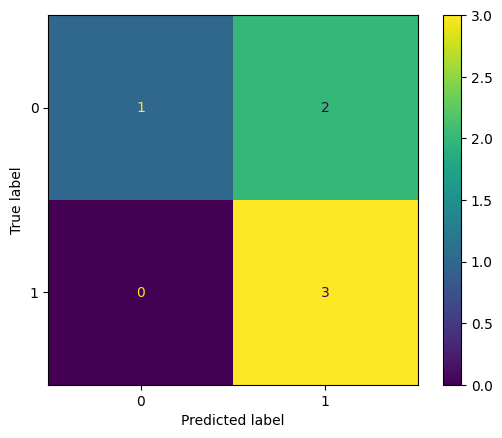

---------------------------------------------------------
FOLD: 2
                precision    recall  f1-score   support

Não suceptível       1.00      1.00      1.00         3
    Suceptível       1.00      1.00      1.00         3

      accuracy                           1.00         6
     macro avg       1.00      1.00      1.00         6
  weighted avg       1.00      1.00      1.00         6



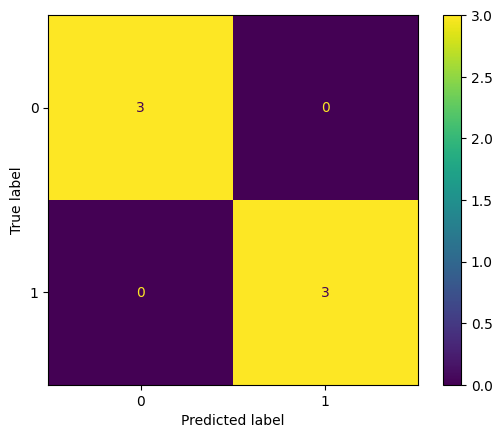

---------------------------------------------------------
FOLD: 3
                precision    recall  f1-score   support

Não suceptível       0.60      1.00      0.75         3
    Suceptível       1.00      0.33      0.50         3

      accuracy                           0.67         6
     macro avg       0.80      0.67      0.62         6
  weighted avg       0.80      0.67      0.62         6



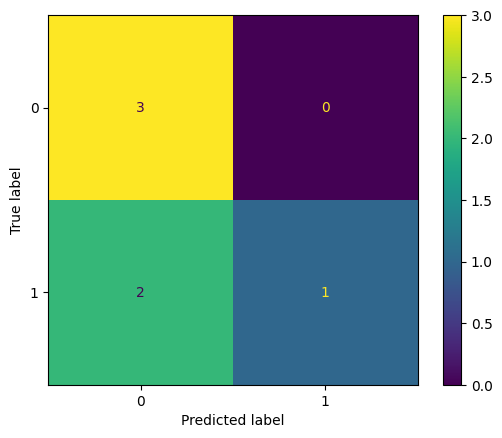

---------------------------------------------------------
FOLD: 4
                precision    recall  f1-score   support

Não suceptível       1.00      0.67      0.80         3
    Suceptível       0.75      1.00      0.86         3

      accuracy                           0.83         6
     macro avg       0.88      0.83      0.83         6
  weighted avg       0.88      0.83      0.83         6



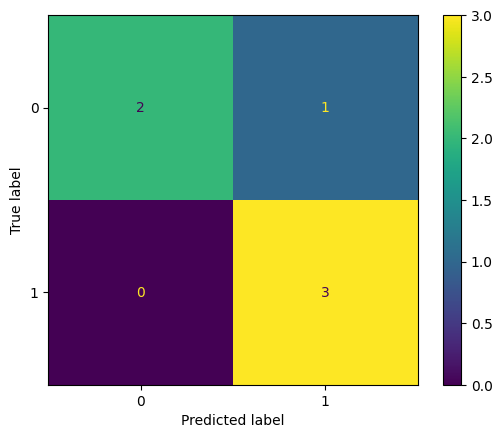

---------------------------------------------------------
FOLD: 5
                precision    recall  f1-score   support

Não suceptível       1.00      1.00      1.00         3
    Suceptível       1.00      1.00      1.00         3

      accuracy                           1.00         6
     macro avg       1.00      1.00      1.00         6
  weighted avg       1.00      1.00      1.00         6



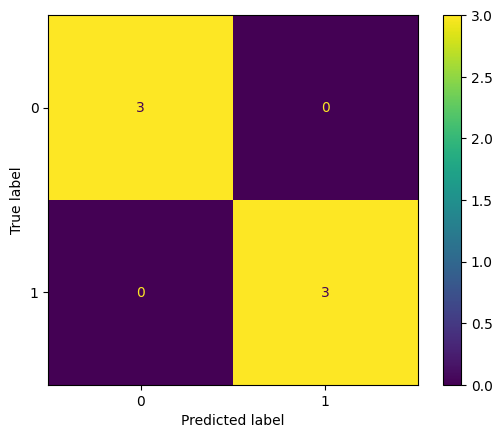

---------------------------------------------------------
FOLD: 6
                precision    recall  f1-score   support

Não suceptível       0.75      1.00      0.86         3
    Suceptível       1.00      0.67      0.80         3

      accuracy                           0.83         6
     macro avg       0.88      0.83      0.83         6
  weighted avg       0.88      0.83      0.83         6



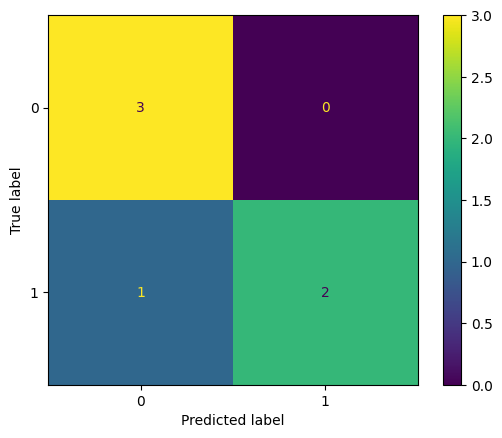

---------------------------------------------------------
FOLD: 7
                precision    recall  f1-score   support

Não suceptível       1.00      1.00      1.00         3
    Suceptível       1.00      1.00      1.00         3

      accuracy                           1.00         6
     macro avg       1.00      1.00      1.00         6
  weighted avg       1.00      1.00      1.00         6



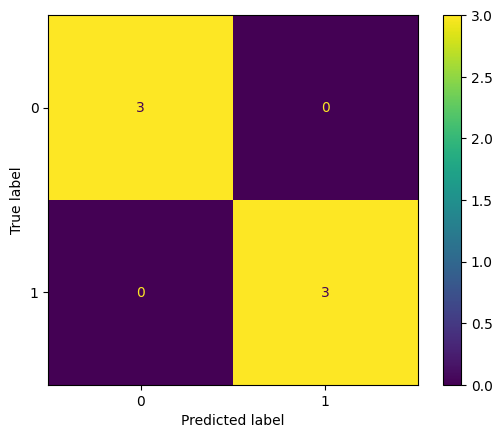

---------------------------------------------------------
FOLD: 8
                precision    recall  f1-score   support

Não suceptível       0.50      0.50      0.50         2
    Suceptível       0.67      0.67      0.67         3

      accuracy                           0.60         5
     macro avg       0.58      0.58      0.58         5
  weighted avg       0.60      0.60      0.60         5



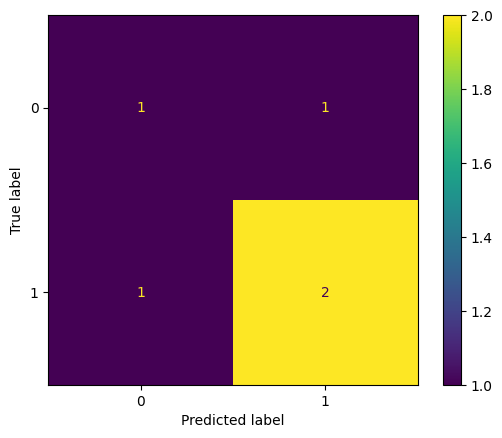

---------------------------------------------------------
FOLD: 9
                precision    recall  f1-score   support

Não suceptível       1.00      1.00      1.00         3
    Suceptível       1.00      1.00      1.00         2

      accuracy                           1.00         5
     macro avg       1.00      1.00      1.00         5
  weighted avg       1.00      1.00      1.00         5



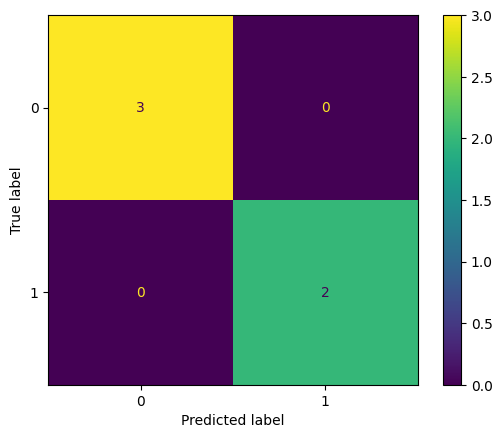

---------------------------------------------------------
FOLD: 10
                precision    recall  f1-score   support

Não suceptível       0.75      1.00      0.86         3
    Suceptível       1.00      0.50      0.67         2

      accuracy                           0.80         5
     macro avg       0.88      0.75      0.76         5
  weighted avg       0.85      0.80      0.78         5



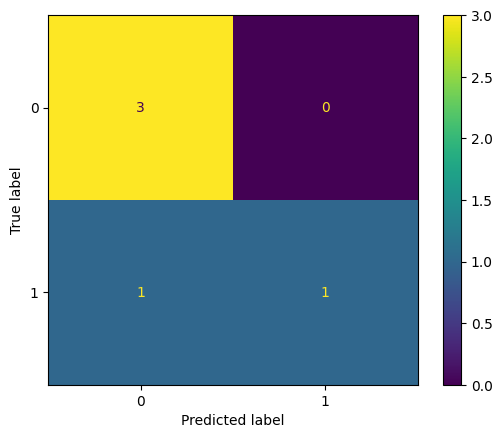

---------------------------------------------------------
Precisão média na validação das classes Inferior e Superior: [0.86 0.9 ]
----------------------------------------------------------------
Recall médio na validação das classes Inferior e Superior: [0.85 0.82]
----------------------------------------------------------------
F1 score médio na validação das classes Inferior e Superior: [0.83 0.82]
----------------------------------------------------------------


In [610]:
from sklearn.neural_network import MLPClassifier

nn_parameters = {
    #'hidden_layer_sizes': [(50,50,50), (50,100,50), (100, 100, 100)],
    #'hidden_layer_sizes': [(1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), 
    #                      (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)],
    'hidden_layer_sizes': [(5,),(5,5), (10,), (10,10), (15,), (15,15), (20,), (20,20)],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'activation': ['relu', 'tanh'],
    'batch_size': [8, 16, 32],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [6000],
    'alpha': [0.0001, 0.001, 0.01]
}

mlp = MLPClassifier()
nn_tuned_params = tuning_hyperparams(mlp, nn_parameters, x_train, y_train);
print(nn_tuned_params)

mlp = MLPClassifier(hidden_layer_sizes=nn_tuned_params.get('hidden_layer_sizes'), 
                    alpha=nn_tuned_params.get('alpha'), 
                    solver=nn_tuned_params.get('solver'), 
                    learning_rate=nn_tuned_params.get('learning_rate'), 
                    batch_size=nn_tuned_params.get('batch_size'), 
                    random_state=42,
                    activation=nn_tuned_params.get('activation'),
                    max_iter=nn_tuned_params.get('max_iter'))

mlpBest, mlp_array_precision = perform_cross_validation(mlp, x_train, y_train)

In [611]:
mlp_accuracy = accuracy_score(y_test, mlpBest.predict(x_test))*100
print("MLP", classification_report(y_test, mlpBest.predict(x_test)))
print('Accuracy:', mlp_accuracy)

MLP               precision    recall  f1-score   support

         0.0       0.88      0.85      0.86        26
         1.0       0.87      0.90      0.89        30

    accuracy                           0.88        56
   macro avg       0.88      0.87      0.87        56
weighted avg       0.88      0.88      0.87        56

Accuracy: 87.5
